In [41]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import os
import numpy as np

file='runComparison.csv'

In [42]:
# # Beryllium
TotalEnergy = -1.4446201118081863e+01
# TotalEnergy = -14.446194361313 # pc-4
ExchangeEnergy = -2.2903921833555341e+00
CorrelationEnergy = -2.2343205529440757e-01
BandEnergy = -8.1232305760491457e+00
KineticEnergy =  1.4309060170370618e+01
ElectrostaticEnergy = -8.1232305760491457e+00
# HartreeEnergy = 7.115165052  
HartreeEnergy = 7.115210167512  # pc-4


figuresDir='/Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/'
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/compareSingularitySubtractionBeryllium/'
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/pRefinement/'
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/hRefinement/'
df = pd.read_csv(resultsDir+file, header=0)
df;
df['correctedOrder'] = df['order']-1


In [43]:
## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [56]:
## Plotting functions

def AversusB(df,A,B,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s' %(A,B))
    df.plot(x=B, y=A, style='o',ax=ax)

    dftfeEnergy = -1.1376237062839634e+00
    NWchemEnergy = -1.1372499
    plt.axhline(y=dftfeEnergy,color='r')
    plt.axhline(y=NWchemEnergy,color='g')
##    plt.plot(dftfeEnergy*np.ones(100),'r-')
##    plt.plot(NWchemEnergy*np.ones(100),'g-')
    if save == True:
        saveID = A+'Vs'+B
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='png', dpi=500)
    plt.show()

def AversusBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
##        group.plot(x=B, y=A, style='o', ax=ax, label='%s = %.2f'%(C,name))
        group.plot(x=B, y=A, style='o', ax=ax, label='%s = %s'%(C,name))
    plt.legend(loc = 'best')

    if save == True:
        saveID = A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='png', dpi=500)
    plt.show()

def logAversusBcolorbyC(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    fig.suptitle('Log %s versus %s colored by %s' %(A,B,C))
    grouped = df.groupby(C)
    for name,group in grouped:
#         group['logA'] = np.log10(np.abs(group[A]))
        group.plot(x=B, y=A, logy=True, style='o', ax=ax, label='%s = %.2f'%(C,name))
##        group.plot(x=B, y='logA', style='o', ax=ax, label='%s = %s'%(C,name))
    plt.legend(loc = 'best')
    plt.xlabel(B)
    plt.ylabel(A)
#     plt.ylim([1e-3,1e-2])
    plt.grid()

    if save == True:
        saveID = 'log'+A+'Vs'+B+'ColoredBy'+C
        plt.savefig(plotsDir+saveID+'.pdf', bbox_inches='tight',format='pdf', dpi=500)
    plt.show()
    
def beryllium_p_refinement(df,A,B,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('Log %s versus %s' %(A,B))
    df.plot(x=B, y="absTotalEnergyError", logy=True, style='ko', ax=ax, label="Total Energy")
    df.plot(x=B, y="absBandEnergyError", logy=True, style='k^', ax=ax, label="Band Energy")
    df.plot(x=B, y="absHartreeEnergyError", logy=True, style='k*', ax=ax, label="Hartree Energy")
    plt.legend()
    plt.xlabel('Order')
    plt.ylabel('Energy Error (Hartree)')
#     plt.ylim([1e-3,1e-2])
    plt.grid()
    
    ax.text(0.1, 0.05, 'a', transform=ax.transAxes,
      fontsize=24, fontweight='bold', va='bottom', ha='right')

    if save != False:
        saveID = save
        print('Saving figure to: ', figuresDir+saveID+'.png')
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()

def singularitySubtraction(df,A,B,C,save=False):
    fig, ax = plt.subplots(figsize=(8,6))
    
    default_cycler = cycler(color=['k']) * (cycler(marker=['o', '^'])) 

    plt.rc('lines', linewidth=0)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
    grouped = df.groupby(C)
    for name,group in grouped:
        print(name)
        if name==0:
            lab='Singularity Skipping'
        if name==1:
            lab='Singularity Subtraction'
        group.plot(x=B, y=A, ax=ax, loglog=True,label=lab)
        
    plt.legend(loc = 'best')
    plt.xlabel('Mesh Size')
    plt.ylabel('Energy Error (Hartree)')
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
    plt.grid()
    
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()
    
def hRefinement(df,save=False):
    default_cycler = (cycler(color=['k']) * (cycler(marker=['o', '^', 's',])) * 
                  cycler(linestyle=['-','--'])) + cycler('color', 'bgr')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)
    
    
    
    
    
    df['maxError']=df[['absTotalEnergyError','absBandEnergyError','absHartreeEnergyError']].max(axis=1)
#     df = df.sort_values(by='numberOfPoints')
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    
    
    grouped = df.groupby('correctedOrder')
    for name,group in grouped:

        group.plot(x='numberOfPoints', y='maxError', fillstyle='none', ax=ax, loglog=True,label='Cell Order = %i'%(name))

    plt.legend(loc = 'best')
    plt.xlabel('Mesh Size')
    plt.ylabel('Energy Errors')
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
    plt.grid()
    
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()
    
def berylliumMeshRefinement(df,A,B,C,save=False):
    df = df.drop(df.index[14])
    
    default_cycler =  ( cycler(marker=['o', '^', 's',]) * cycler(linestyle=['-']) ) + cycler('color', 'bgr')
    # cycler('color', 'bgrcmyk')

    plt.rc('lines', linewidth=0)
    plt.rc('axes', prop_cycle=default_cycler)

#     df.loc[df['divideParameter3'].isin(6e-8)]
    
#     df2 = df.loc[df['divideParameter3']==6e-8]
#     df2 = df2.loc[df2['energyTolerance']==5e-7]
#     df = df.loc[df['divideParameter3'] != 6e-8]
    fig, ax = plt.subplots(figsize=(8,6))
    df.plot(x=B, y='absTotalEnergyError', fillstyle='none', markerSize=8, ax=ax, loglog=True, label='Total Energy Error')
    df.plot(x=B, y='absBandEnergyError', fillstyle='none', markerSize=7, ax=ax, loglog=True, label='Band Energy Error')
    df.plot(x=B, y='absHartreeEnergyError', fillstyle='none', markerSize=8, ax=ax, loglog=True, label='Hartree Energy Error')
    
    
    
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
#     grouped = df.groupby(C)
#     for name,group in grouped:
#         group.plot(x=B, y=A, style='bo', markerSize=12, ax=ax, loglog=True, legend=False)
#         if isinstance(name,str):
#             group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %s'%(C,name))
#         elif isinstance(name,float):
#             group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %1.3e'%(C,name))
#         elif isinstance(name,int):
#             group.plot(x=B, y=A, style='o', ax=ax, loglog=True,label='%s = %i'%(C,name))
    plt.legend() 
    plt.grid()
    ax.text(0.95, 0.05, 'b', transform=ax.transAxes,
      fontsize=24, fontweight='bold', va='bottom', ha='right')
    
    
#     df2.plot(x=B, y='absTotalEnergyError', style='bo', markerSize=8, ax=ax, loglog=True)
#     df2.plot(x=B, y='absBandEnergyError', style='ro', markerSize=6, ax=ax, loglog=True,legend=False)
#     df2.plot(x=B, y='absHartreeEnergyError', style='go', markerSize=8, ax=ax, loglog=True,legend=False)
    plt.xlabel('Mesh Refinement Parameter')
    plt.ylabel('Energy Error (Hartree)')
     
#     plt.xlim([3e5,2e6])
#     plt.ylim([5e-5,1e-2])
#     plt.grid()
    
    
    if save != False:
        saveID = save
        print('Saving figure to: ', figuresDir+saveID+'.png')
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()


In [58]:
# logAversusLogBcolorbyC(df,'absTotalEnergyError', 'numberOfPoints', 'order')
# logAversusB(df,'absTotalEnergyError', 'numberOfPoints')

# df2 = df.loc[df['order']==5]
# berylliumMeshRefinement(df2,'absTotalEnergyError', 'divideParameter3', 'divideParameter3',save='beryllium-h-refinement')


# df3 = df.loc[df['divideParameter3']==3*10**(-7)]
# beryllium_p_refinement(df3,'absTotalEnergyError', 'correctedOrder',save='p-refinement')

df=df.sort_values(by=['divideParameter3'])
# hRefinement(df,save='/Users/nathanvaughn/Desktop/meshTests/beryllium/beryllium-h-verus-p')
hRefinement(df,save='beryllium-h-verus-p')

ValueError: Can only add equal length cycles, not 6 and 3

<IPython.core.display.Javascript object>


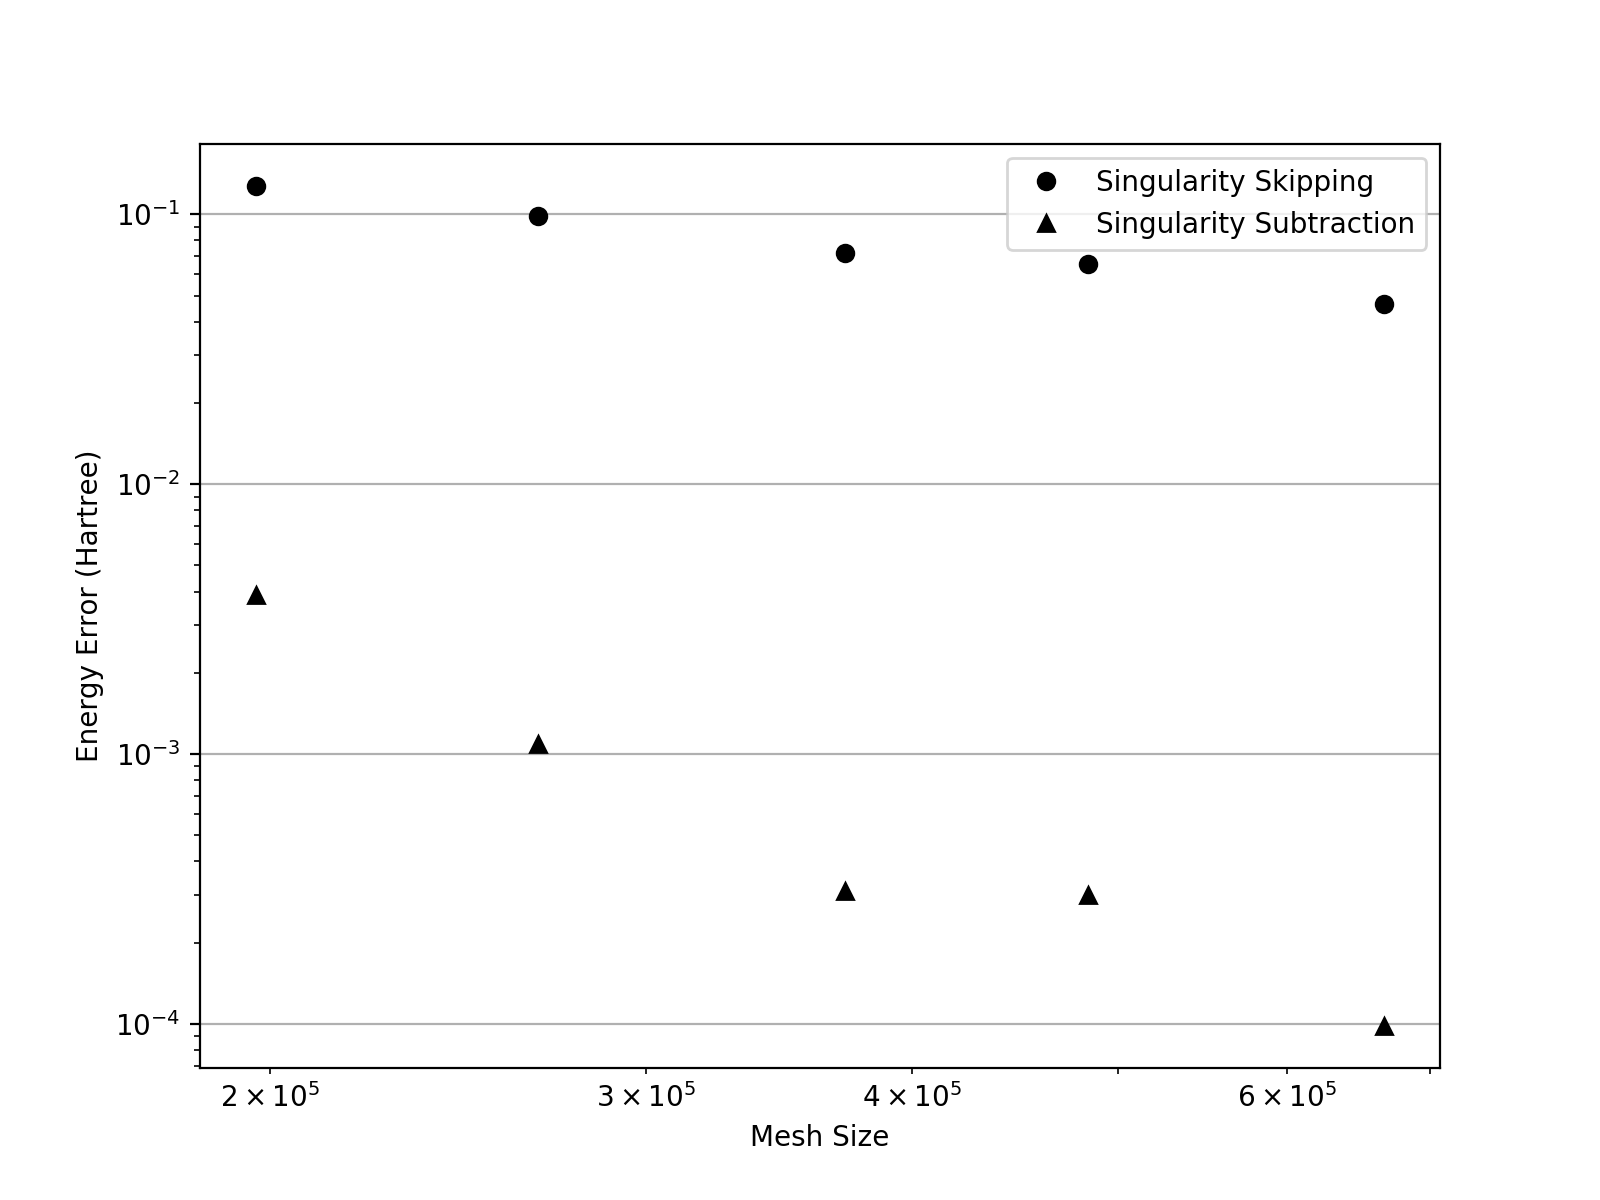

0
1


In [18]:
df2 = df.loc[df['order']==5]
# df2
singularitySubtraction(df2,'absTotalEnergyError', 'numberOfPoints', 'GreenSingSubtracted',save='beryllium_singularity_subtraction')